In [1]:
import glacierml as gl
import os
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


2023-12-01 07:51:52.618733: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-01 07:51:52.663789: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-01 07:51:53.398746: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
df = gl.coregister_data('4')
df = df.drop(df[df['RGIId'].duplicated(keep = False)].index)

df = df.sample(frac = 1,random_state = 0)
df = df.reset_index().drop('index', axis = 1)

dft = df.copy()

trfeat, tefeat, trlabs, telabs = gl.split_data(df)

In [3]:
inputs = (len(df.columns) - 2) * len(df)

In [4]:
# models_mse = {}
# models_mae = {}
# architecture = {}

# path = '/data/fast1/glacierml/models/LOO_loss_testing/'
# n = 0
# m = 0
# for i in os.listdir(path):
#     if i == 'mae':
#         for j in tqdm(os.listdir(os.path.join(path,i))):
#             model_path = os.path.join(path,i,j)
#             models_mae[n] = gl.load_dnn_model(model_path)
#             architecture[n] = str(j)
#             n = n+1
#     if i == 'mse':
#         for k in tqdm(os.listdir(os.path.join(path,i))):
#             model_path = os.path.join(path,i,k)
#             models_mse[m] = gl.load_dnn_model(model_path)
#             m = m+1

# res = pd.DataFrame()
# for i in models_mse:
#     params = pd.Series(models_mae[i].count_params(),name = 'Params')
#     mae = pd.Series(models_mae[i].evaluate(tefeat,telabs), name = 'MAE')
#     mse = pd.Series(models_mse[i].evaluate(tefeat,telabs), name = 'MSE')
#     arch = pd.Series(architecture[i], name = 'Arch')
#     temp = pd.concat([arch,params,mae,mse],axis = 1)
#     res = pd.concat([res,temp])
    
# res = res.reset_index().drop('index', axis = 1)
# res.to_pickle('/data/fast1/glacierml/models/LOO_loss_testing/results.pkl')
res = pd.read_pickle('/data/fast1/glacierml/models/LOO_loss_testing/results.pkl')

Text(0, 0.5, 'Mean Squared Error')

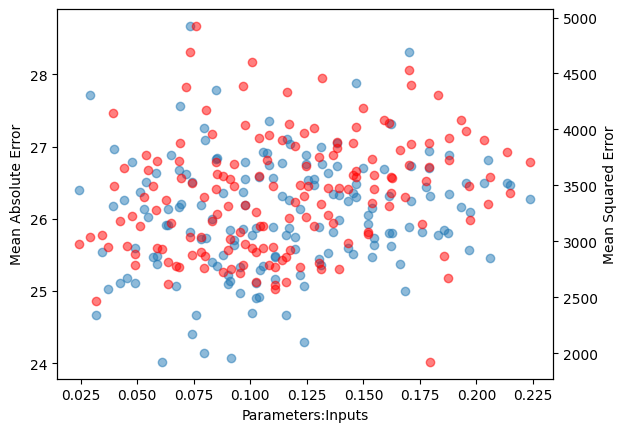

In [5]:
x1 = np.sort(res['Params'] / inputs)
y1 = (res['MAE'])
y2 = (res['MSE'])

fig, ax = plt.subplots()
ax.scatter(
x1,y1,
alpha = 0.5,
    label = 'MAE'
)

ax2 = ax.twinx()
ax2.scatter(
x1,y2,
color = 'r',
alpha = 0.5,
    label = 'MSE'
)

ax.set_xlabel('Parameters:Inputs')
ax.set_ylabel('Mean Absolute Error')
ax2.set_ylabel('Mean Squared Error')

In [6]:
t = res.copy()

for i in range(161):
    print(i)
    x = np.min(t['MAE'])
    y = np.min(t['MSE'])
    
    if t[t['MAE'] == x].index == t[t['MSE'] == y].index:
        print('Success!')
        print(t[t['MAE'] == x])
        break
        
    else:
        t = t.drop(t[t['MAE'] == x].index)
        t = t.drop(t[t['MSE'] == y].index)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
Success!
  Arch  Params        MAE          MSE
3  6-2      96  25.545818  3058.937988


In [7]:
t

,Arch,Params,MAE,MSE
3,6-2,96,25.545818,3058.937988
5,8-2,120,26.181328,4146.492676
6,9-2,132,26.972464,3496.875732
8,11-2,156,26.255985,3656.848633
10,13-2,180,26.789158,3223.522461
...,...,...,...,...
155,20-14,528,26.495504,3902.415771
156,16-15,450,26.808529,3335.957275
158,18-15,500,26.495394,3795.173096
159,19-15,525,26.470150,3436.290039


In [ ]:
x1 = t['Params'] / inputs
y1 = t['MAE']
y2 = t['MSE']

fig, ax = plt.subplots()
ax.scatter(
x1,y1,
alpha = 0.5,
    label = 'MAE'
)
ax2 = ax.twinx()
ax2.scatter(
x1,y2,
color = 'r',
alpha = 0.5,
    label = 'MSE'
)

ax.set_xlabel('Parameters:Inputs')
ax.set_ylabel('Mean Absolute Error')
ax2.set_ylabel('Mean Squared Error')

Text(0, 0.5, 'Mean Squared Error')